In [39]:
import pandas as pd
dataset = pd.read_csv("training.1600000.processed.noemoticon.csv",
                      encoding="ISO-8859-1",
                      names=['sentiment','ids','date','flag','user','text'])  


In [40]:
X = dataset['text']
y = dataset['sentiment']

In [41]:
X

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [42]:
count_sentiments = pd.value_counts(y,sort = True)

In [43]:
count_sentiments

4    800000
0    800000
Name: sentiment, dtype: int64

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
sample_data = dataset.sample(n=500000)

In [46]:
sample_data[sample_data['sentiment']==0]

,sentiment,ids,date,flag,user,text
612302,0,2224913958,Thu Jun 18 10:05:09 PDT 2009,NO_QUERY,BikeJoeBike,Rain = No bike rides today
266795,0,1989063451,Mon Jun 01 00:13:33 PDT 2009,NO_QUERY,deepakpanigrahy,@imanpreet I did not like it at all. I was ver...
360901,0,2046601181,Fri Jun 05 12:25:12 PDT 2009,NO_QUERY,mykimmykim,@nicolle77 Not fair. I want to keep my iPhone...
166977,0,1961502646,Fri May 29 09:36:07 PDT 2009,NO_QUERY,lrnn,Had the hottest and stressiest day at work f ...
258753,0,1985263246,Sun May 31 16:45:45 PDT 2009,NO_QUERY,jolenemooney,I really hope i dont have to move interstate j...
...,...,...,...,...,...,...
566966,0,2207023455,Wed Jun 17 07:22:52 PDT 2009,NO_QUERY,alansauce,Going through my pictures. Fun times. http:/...
100695,0,1794093709,Thu May 14 04:56:25 PDT 2009,NO_QUERY,celineros,Did you forget everything we ever had? Did you...
439642,0,2066494757,Sun Jun 07 10:37:39 PDT 2009,NO_QUERY,Thomas514,Man it's a beautiful sunny day today. I am goi...
407411,0,2059167780,Sat Jun 06 16:23:03 PDT 2009,NO_QUERY,muhlizuh,Over a week without seeing &quot;Cutie&quot; i...


In [47]:
X_sample = sample_data['text']
y_sample = sample_data['sentiment']

In [48]:
count_sentiments_sample = pd.value_counts(y_sample,sort = True)
count_sentiments_sample

0    250006
4    249994
Name: sentiment, dtype: int64

In [49]:
X_sample

1328348    Financial success is not rocket science.  For ...
612302                           Rain = No bike rides today 
1187257    Perhaps the only movie where Kate Winslet isnt...
266795     @imanpreet I did not like it at all. I was ver...
1489832    heeeeey guys  just lying in bed. school tomorr...
                                 ...                        
1034547                   @mrzhollywood  made ya laugh homie
439642     Man it's a beautiful sunny day today. I am goi...
1145951    @KW2P Didn't know you had a Flickr account. Ju...
407411     Over a week without seeing &quot;Cutie&quot; i...
644319         I have a headache on a lovely Friday.Awesome 
Name: text, Length: 500000, dtype: object

Preprocess Data

In [50]:
# Convert to Lower Case
X_sample = X_sample.str.lower()
# Replace Number
X_sample = X_sample.str.replace("(\d+)[^ ]*",' ')
# Replace URL
X_sample = X_sample.str.replace("(http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*",' ')
# Replace Tag
X_sample = X_sample.str.replace("@[^ ]*",' ')
# Replace '# to nothing
X_sample = X_sample.str.replace("'",'')
# Remove Punctuation
X_sample = X_sample.str.replace('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]',' ')
# Replace 3+ Consecutive Letter with only 2
X_sample = X_sample.str.replace("(.)\\1\\1+",'\\1\\1')
# Remove Independent words with length 1
X_sample = X_sample.str.replace("(^| ).( |$)",' ')

In [51]:
from nltk.tokenize import casual_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
stop_words = stopwords.words('english')

In [52]:
X_clean = []
for sentence in X_sample:
  # sentence = str(TextBlob(sentence).correct())
    tokenized = casual_tokenize(sentence)
    new_tokenized = ""
    for word in tokenized:
        #Lemmatizing
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word)
        #Stemming
        stemmer = SnowballStemmer('english')
        word = stemmer.stem(word) 
        #Remove Stopword
        word = word if word not in stop_words else "a"
        new_tokenized += (word + ' ')
    X_clean.append(new_tokenized)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_sample,test_size=0.3,random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = "english", ngram_range=(1,2))
vect.fit(X_clean)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,BaseDiscreteNB,GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import numpy as np

model =  MultinomialNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

Precision: 0.7774869472488817
Recall: 0.7471187884272444
Accuracy: 0.7662066666666667
Confusion Matrix:


Text(33.0, 0.5, 'Predict')

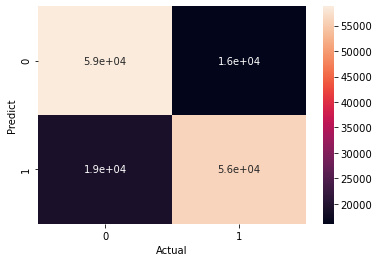

In [56]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder().fit_transform(y_test.values)
y = LabelEncoder().fit_transform(y_predict)
precision = precision_score(x,y)
recall = recall_score(x,y)
accuracy = accuracy_score(x,y)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("Accuracy: {}".format(accuracy))
print('Confusion Matrix:')
import seaborn as sns
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     74858
           4       0.78      0.75      0.76     75142

    accuracy                           0.77    150000
   macro avg       0.77      0.77      0.77    150000
weighted avg       0.77      0.77      0.77    150000

